<a href="https://www.kaggle.com/code/utkarshx27/riding-with-a-drinking-driver-data-eda?scriptVersionId=129282415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riding-with-a-driver-who-has-been-drinking/YouthRisk2007.csv


# Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/riding-with-a-driver-who-has-been-drinking/YouthRisk2007.csv')
#df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Finding Missing Values and Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13387 entries, 0 to 13386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13387 non-null  int64  
 1   ride.alc.driver  13387 non-null  int64  
 2   female           12632 non-null  float64
 3   grade            13320 non-null  float64
 4   age4             13333 non-null  float64
 5   smoke            12999 non-null  float64
 6   DriverLicense    13333 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 732.2 KB


In [4]:
df.describe()

,Unnamed: 0,ride.alc.driver,female,grade,age4,smoke,DriverLicense
count,13387.000000,13387.000000,12632.000000,13320.000000,13333.000000,12999.000000,13333.000000
mean,6694.000000,0.312019,0.527707,10.520571,16.157279,0.534349,0.676892
std,3864.638362,0.463335,0.499251,1.117887,1.211605,0.498838,0.467681
min,1.000000,0.000000,0.000000,9.000000,14.000000,0.000000,0.000000
25%,3347.500000,0.000000,0.000000,10.000000,15.000000,0.000000,0.000000
50%,6694.000000,0.000000,1.000000,11.000000,16.000000,1.000000,1.000000
75%,10040.500000,1.000000,1.000000,12.000000,17.000000,1.000000,1.000000
max,13387.000000,1.000000,1.000000,12.000000,18.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
ride.alc.driver      0
female             755
grade               67
age4                54
smoke              388
DriverLicense       54
dtype: int64

# Data Preprocessing

In [6]:
df.rename(columns={'ride.alc.driver': 'ride_alc_driver', 'age4': 'age', 'smoke': 'smoked', 'DriverLicense': 'driver_license'}, inplace=True)
df['female'].fillna(df['female'].mode()[0], inplace=True)
df['grade'].fillna(df['grade'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(subset=['smoked', 'driver_license'], inplace=True)

In [7]:
df.head()

,ride_alc_driver,female,grade,age,smoked,driver_license
0,1,1.0,10.0,15.0,1.0,0.0
1,1,1.0,10.0,18.0,1.0,1.0
3,0,0.0,11.0,17.0,0.0,1.0
4,0,0.0,11.0,17.0,0.0,1.0
5,0,0.0,11.0,17.0,1.0,1.0


# Exploratory data analysis (EDA)

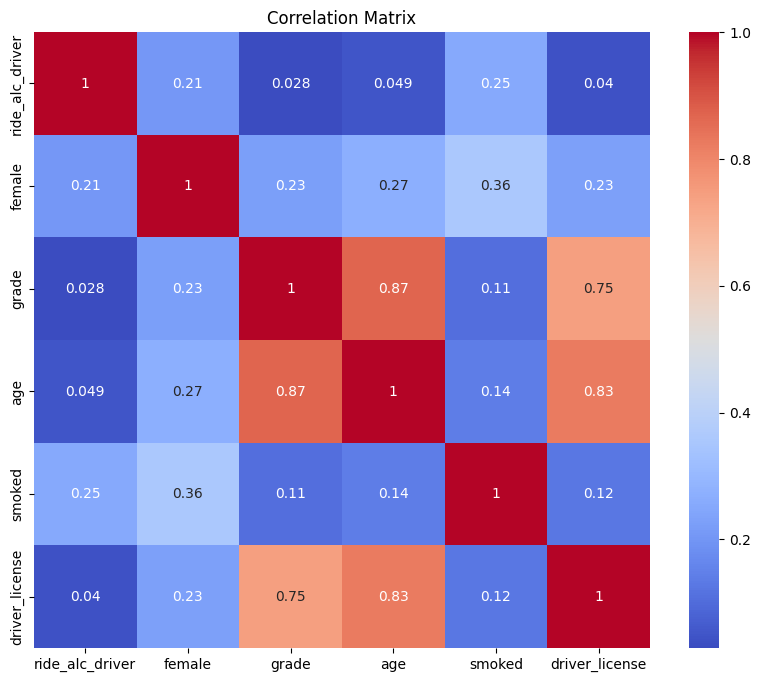

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

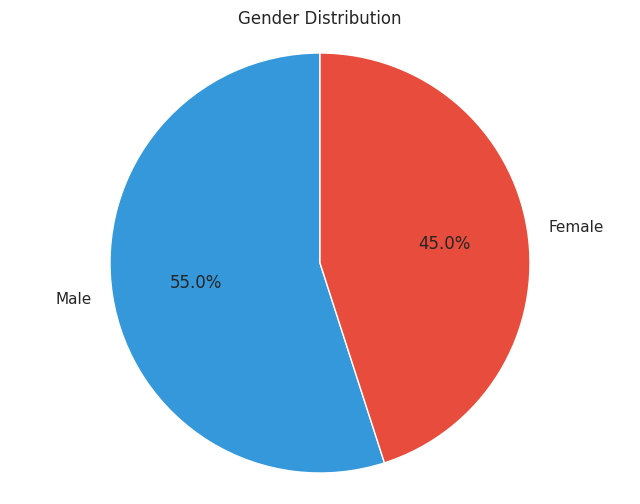

In [9]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(8, 6))
gender_counts = df['female'].value_counts()
labels = ['Male', 'Female']
colors = ['#3498db', '#e74c3c']
ax.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Gender Distribution')
ax.axis('equal')
plt.show()

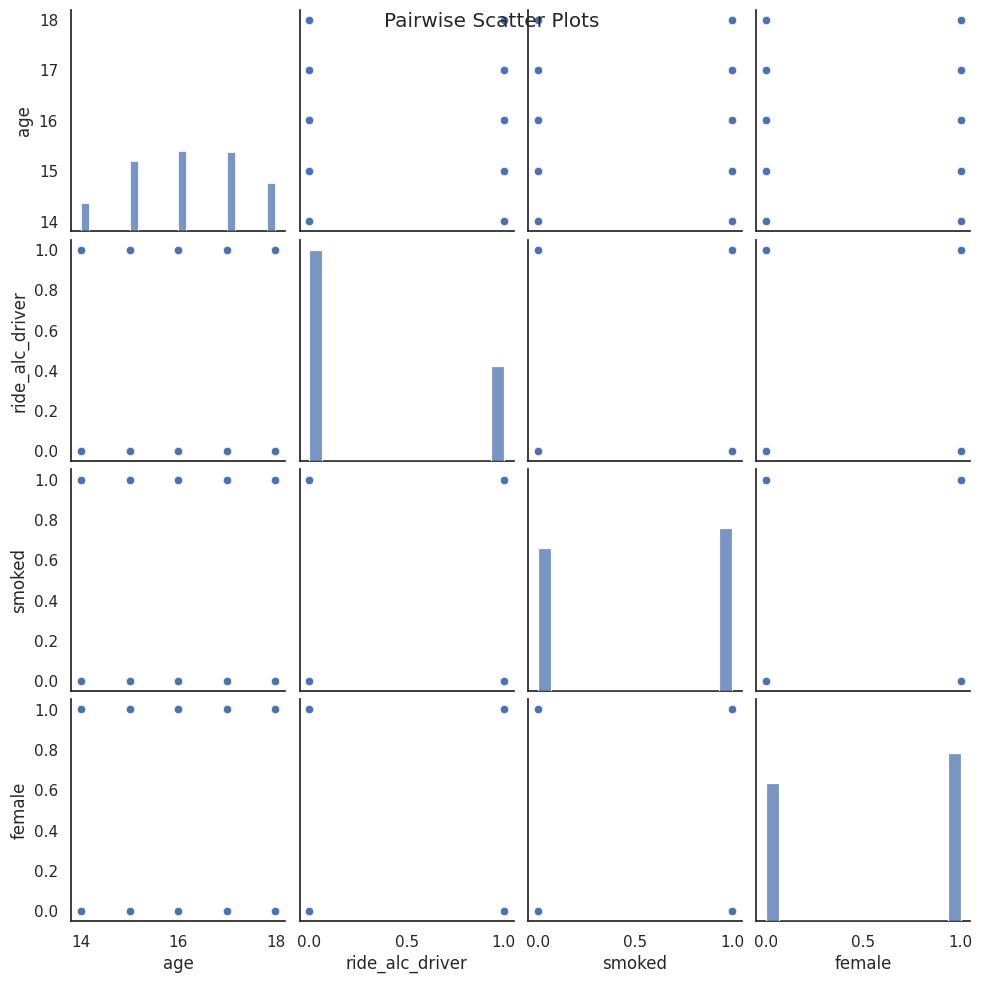

In [10]:
variables = ['age', 'ride_alc_driver', 'smoked', 'female']
sns.pairplot(df[variables])
plt.suptitle('Pairwise Scatter Plots')
plt.show()

Empty DataFrame
Columns: [ride_alc_driver, female, grade, age, smoked, driver_license]
Index: []


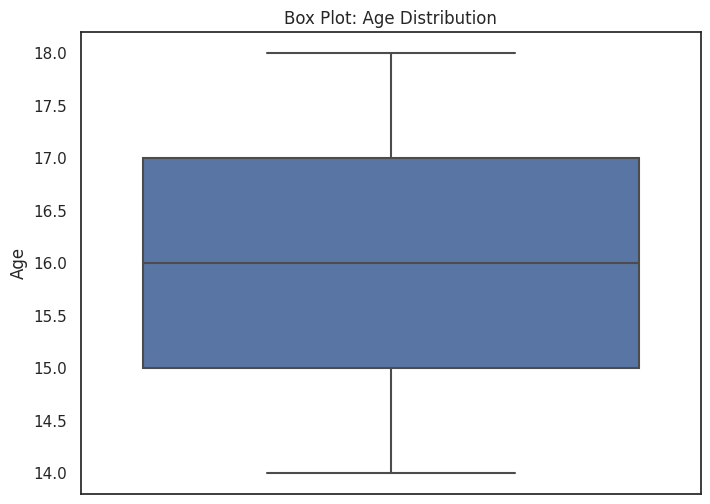

In [11]:
#IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  #lower nd upper bounds for outliers
upper_bound = Q3 + 1.5 * IQR
#outlier
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outliers)
#boxplott
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='age')
plt.ylabel('Age')
plt.title('Box Plot: Age Distribution')
plt.show()

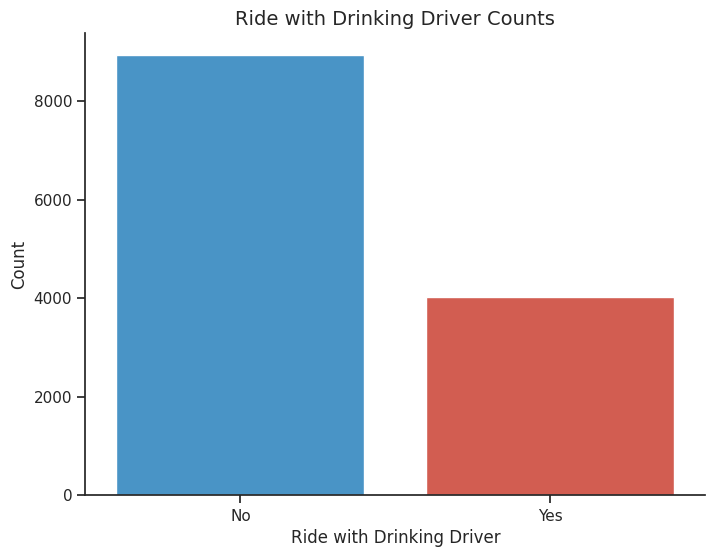

In [12]:
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["#3498db", "#e74c3c"]
sns.countplot(data=df, x='ride_alc_driver', palette=colors, ax=ax)
ax.set_xlabel('Ride with Drinking Driver', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Ride with Drinking Driver Counts', fontsize=14)
ax.set_xticklabels(['No', 'Yes'])
sns.despine()
plt.show()

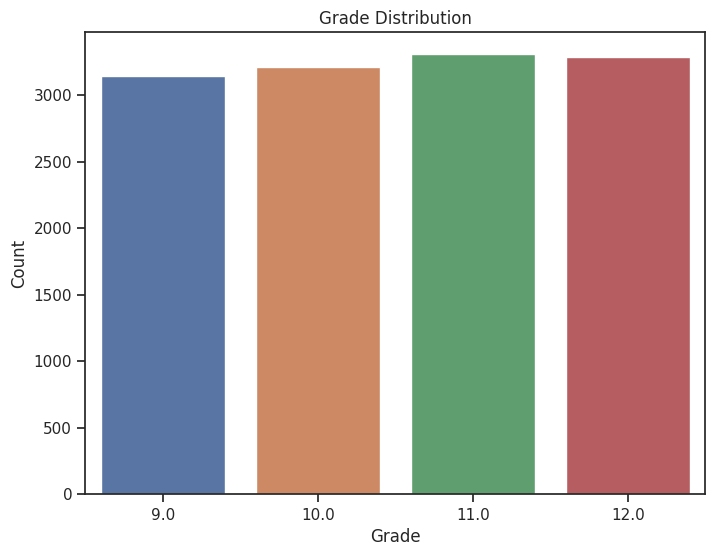

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.show()

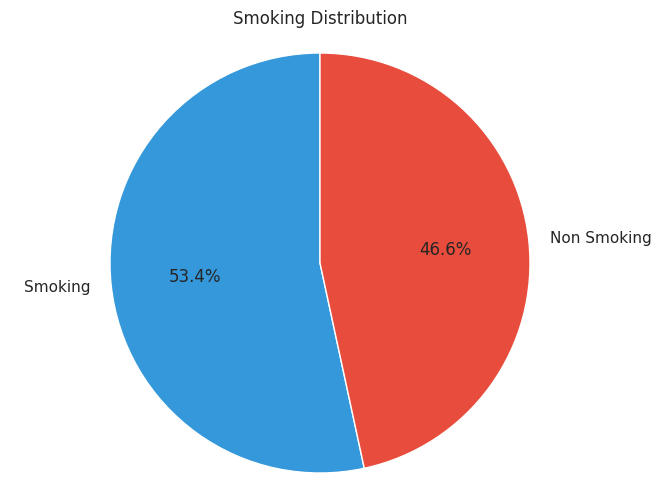

In [14]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(8, 6))
gender_counts = df['smoked'].value_counts()
labels = ['Smoking', 'Non Smoking']
colors = ['#3498db', '#e74c3c']
ax.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Smoking Distribution')
ax.axis('equal')
plt.show()

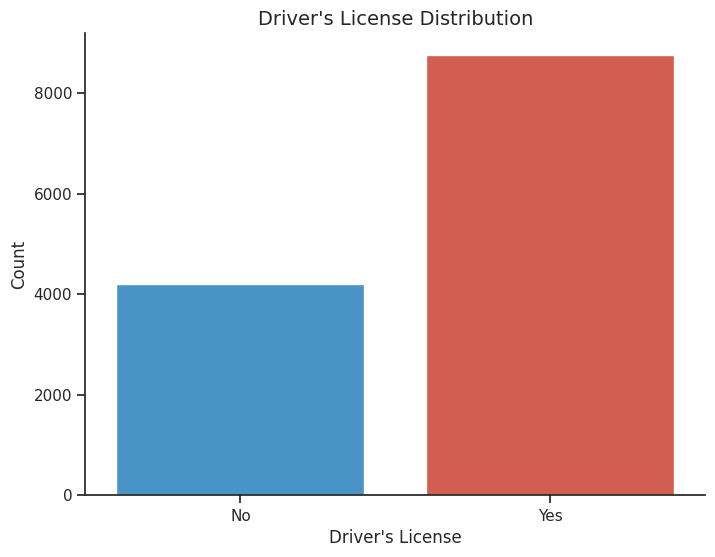

In [15]:
sns.set(style='ticks')
fig, ax = plt.subplots(figsize=(8, 6))
colors = ["#3498db", "#e74c3c"]
sns.countplot(data=df, x='driver_license', palette=colors, ax=ax)
ax.set_xlabel("Driver's License", fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title("Driver's License Distribution", fontsize=14)

ax.set_xticklabels(['No', 'Yes'])
sns.despine()
plt.show()

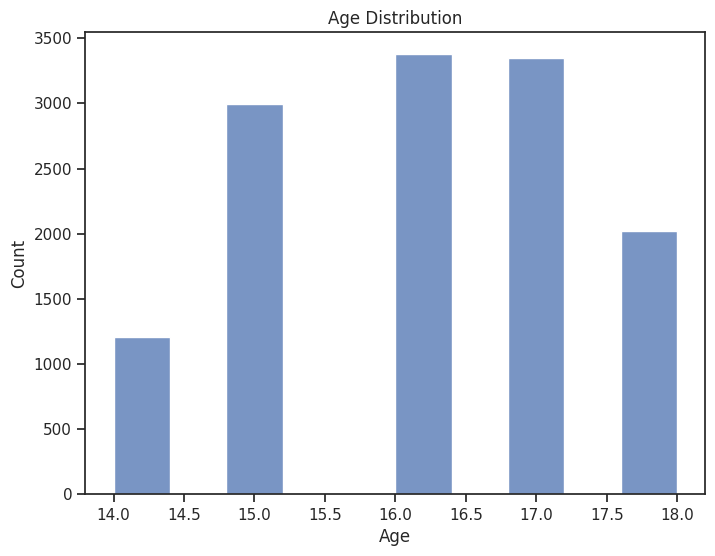

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

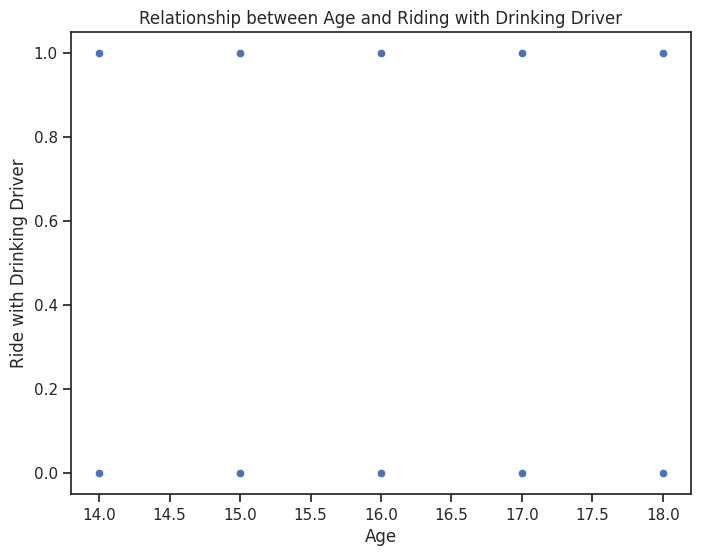

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='ride_alc_driver')
plt.xlabel('Age')
plt.ylabel('Ride with Drinking Driver')
plt.title('Relationship between Age and Riding with Drinking Driver')
plt.show()

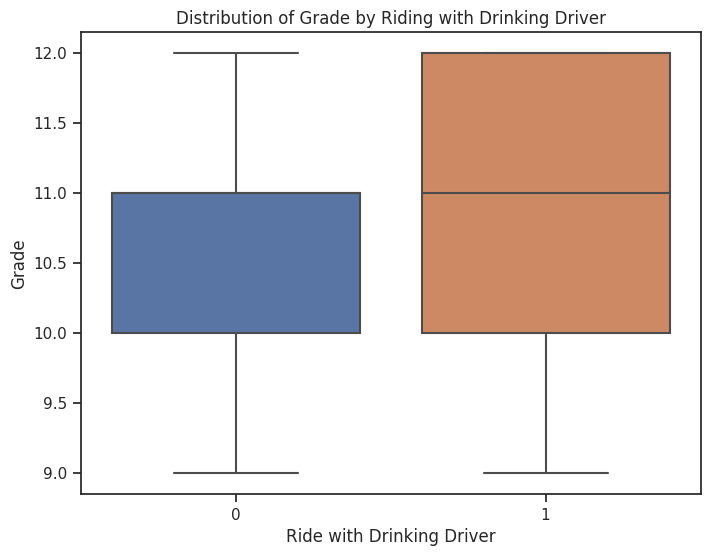

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ride_alc_driver', y='grade')
plt.xlabel('Ride with Drinking Driver')
plt.ylabel('Grade')
plt.title('Distribution of Grade by Riding with Drinking Driver')
plt.show()

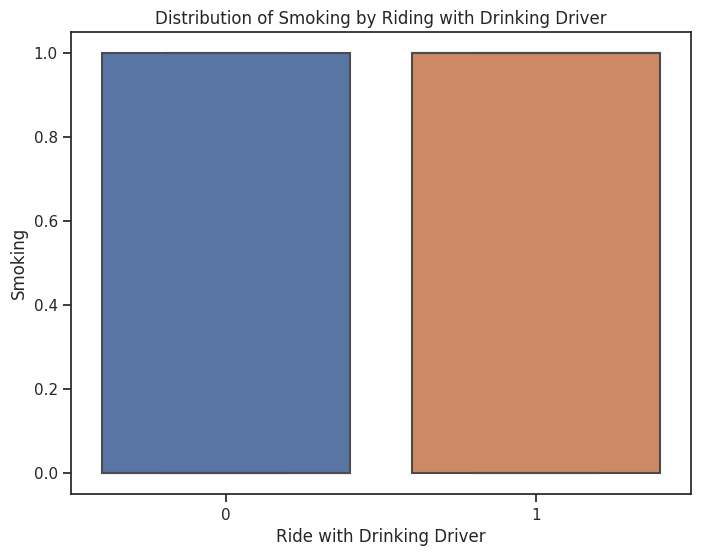

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ride_alc_driver', y='smoked')
plt.xlabel('Ride with Drinking Driver')
plt.ylabel('Smoking')
plt.title('Distribution of Smoking by Riding with Drinking Driver')
plt.show()

In [20]:
cross_tab = pd.crosstab(df['ride_alc_driver'], df['smoked'])
print(cross_tab)

smoked            0.0   1.0
ride_alc_driver            
0                4924  4006
1                1112  2906


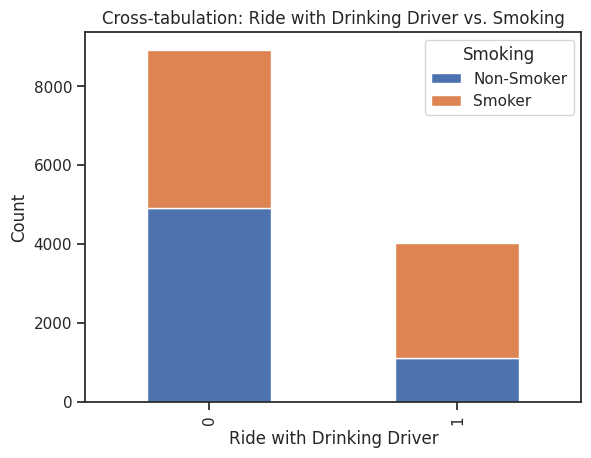

In [21]:
cross_tab = pd.crosstab(df['ride_alc_driver'], df['smoked'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Ride with Drinking Driver')
plt.ylabel('Count')
plt.title('Cross-tabulation: Ride with Drinking Driver vs. Smoking')
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()